# 1. Analisis exploratorio Vacunacion y Ratio de suicidio

OBJETIVO : Contrastar estas variables con el indicador de esperanza de vida

Importamos librerias

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os 
import missingno as msn 
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

c:\Users\javier.pina\AppData\Local\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Leo los archivos

In [2]:
Vacunacion = pd.read_csv(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\PROYECTO FINAL\global_vaccination_coverage.csv')
Ratio_suicidio = pd.read_csv(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\PROYECTO FINAL\death_rate_from_suicides_gho.csv')

Veo los datos que lo componen las dos dataframes

In [3]:
Vacunacion

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,Zimbabwe,ZWE,2017,95.0,89.0,89.0,NaN,90.0,89.0,89.0,90.0,91.0,NaN,89.0
7893,Zimbabwe,ZWE,2018,95.0,89.0,89.0,NaN,88.0,89.0,89.0,88.0,90.0,NaN,89.0
7894,Zimbabwe,ZWE,2019,95.0,90.0,90.0,65.0,85.0,90.0,90.0,85.0,92.0,NaN,90.0
7895,Zimbabwe,ZWE,2020,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0


In [4]:
Ratio_suicidio

,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.7100
1,Afghanistan,AFG,2001,7.8900
2,Afghanistan,AFG,2002,7.8500
3,Afghanistan,AFG,2003,7.7200
4,Afghanistan,AFG,2004,7.7700
...,...,...,...,...
3875,Zimbabwe,ZWE,2015,30.7352
3876,Zimbabwe,ZWE,2016,28.6973
3877,Zimbabwe,ZWE,2017,25.8514
3878,Zimbabwe,ZWE,2018,23.8676


# 2. Veo los datos de VACUNACION

In [ ]:
# En vacunacion podemos ver que no hay duplicados
# Hay muchos valores nulos

In [6]:
Vacunacion[Vacunacion['Code'].isna()]

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
42,African Region (WHO),NaN,1980,9.0,NaN,NaN,NaN,6.0,NaN,6.0,0.0,NaN,NaN,5.0
43,African Region (WHO),NaN,1981,24.0,NaN,NaN,NaN,12.0,NaN,11.0,0.0,NaN,NaN,11.0
44,African Region (WHO),NaN,1982,25.0,NaN,NaN,NaN,14.0,NaN,13.0,0.0,NaN,NaN,12.0
45,African Region (WHO),NaN,1983,32.0,NaN,NaN,NaN,21.0,NaN,19.0,0.0,NaN,NaN,18.0
46,African Region (WHO),NaN,1984,35.0,NaN,NaN,NaN,26.0,NaN,24.0,0.0,NaN,NaN,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,Western Pacific Region (WHO),NaN,2017,97.0,92.0,24.0,86.0,96.0,12.0,96.0,95.0,1.0,NaN,96.0
7727,Western Pacific Region (WHO),NaN,2018,96.0,90.0,25.0,87.0,95.0,14.0,95.0,95.0,2.0,NaN,94.0
7728,Western Pacific Region (WHO),NaN,2019,95.0,94.0,27.0,92.0,95.0,16.0,95.0,94.0,2.0,NaN,94.0
7729,Western Pacific Region (WHO),NaN,2020,93.0,94.0,30.0,92.0,94.0,19.0,93.0,94.0,2.0,NaN,94.0


In [7]:
# Creo que no hay manera de crear una variable unica con respecto a este CODE ya que los paises son muy variados

Vacunacion[Vacunacion['Code'].isna()]['Entity'].unique()

# Como se puede comparar en esta query

array(['African Region (WHO)', 'Eastern Mediterranean Region (WHO)',
       'European Region (WHO)', 'Region of the Americas (WHO)',
       'South-East Asia Region (WHO)', 'Western Pacific Region (WHO)'],
      dtype=object)

In [8]:
# Le pido que, por columna me diga que porcentaje hay de nulos ya que veo que hay muchos

Vacunacion.isna().mean()*100

# Quitaria los que tienen mas de un tanto por ciento, pero hay que ver lo que influyen o la correlacion que tienen con esperanza de vida para ver si son muy relevantes o no

Entity                                   0.000000
Code                                     3.191085
Year                                     0.000000
BCG (% of one-year-olds immunized)      17.728251
HepB3 (% of one-year-olds immunized)    43.826770
Hib3 (% of one-year-olds immunized)     54.045840
IPV1 (% of one-year-olds immunized)     83.576042
MCV1 (% of one-year-olds immunized)      2.140053
PCV3 (% of one-year-olds immunized)     81.043434
Pol3 (% of one-year-olds immunized)      0.531848
RCV1 (% of one-year-olds immunized)     46.840572
RotaC (% of one-year-olds immunized)    86.843105
YFV (% of one-year-olds immunized)      89.565658
DTP3 (% of one-year-olds immunized)      0.544511
dtype: float64

In [9]:
# Hay que ver a que hace referencia estas columnas, ya que pueden que sean una vacunacion de africa solo y por eso es tan alto los nulos

Vacunacion[Vacunacion['YFV (% of one-year-olds immunized)'].isna()]

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,Zimbabwe,ZWE,2017,95.0,89.0,89.0,NaN,90.0,89.0,89.0,90.0,91.0,NaN,89.0
7893,Zimbabwe,ZWE,2018,95.0,89.0,89.0,NaN,88.0,89.0,89.0,88.0,90.0,NaN,89.0
7894,Zimbabwe,ZWE,2019,95.0,90.0,90.0,65.0,85.0,90.0,90.0,85.0,92.0,NaN,90.0
7895,Zimbabwe,ZWE,2020,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0


# 3. Veo los datos de SUICIDIOS

In [10]:
# En suicidios podemos ver que no hay duplicados tampoco

In [11]:
# Las columnas no tienen muchos nulos por lo que no modificaria muchos datos

Ratio_suicidio.isna().mean()*100

Entity                                             0.000000
Code                                               5.154639
Year                                               0.000000
Age-standardized suicide rate - Sex: both sexes    0.000000
dtype: float64

# 4. Una vez visto esto, voy a ver la correlacion que puede existir con la esperanza de vida 

Cargo esperanza de vida

In [12]:
esperanza_vida = pd.read_csv(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\PROYECTO FINAL\life_expectancy.csv')
esperanza_vida

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258
...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242


Compruebo los datos que tenemos para esta variable

In [13]:
# Duplicados

esperanza_vida.duplicated().sum()

0

In [14]:
# Nulos

esperanza_vida.isna().sum()

Entity                                                    0
Code                                                   1694
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

In [15]:
# Miro que entitys tienen los que CODE es null para ver si se puede elimiar o no

esperanza_vida[esperanza_vida['Code'].isna()]['Entity'].unique().tolist()

['Africa',
 'Americas',
 'Asia',
 'England and Wales',
 'Europe',
 'High-income countries',
 'Land-locked Developing Countries (LLDC)',
 'Latin America and the Caribbean',
 'Least developed countries',
 'Less developed regions',
 'Less developed regions, excluding China',
 'Less developed regions, excluding least developed countries',
 'Low-income countries',
 'Lower-middle-income countries',
 'Middle-income countries',
 'More developed regions',
 'No income group available',
 'Northern America',
 'Northern Ireland',
 'Oceania',
 'Scotland',
 'Small Island Developing States (SIDS)',
 'Upper-middle-income countries']

In [16]:
# Miro el total de registros por columnas

esperanza_vida.isna().count()

Entity                                                 20755
Code                                                   20755
Year                                                   20755
Period life expectancy at birth - Sex: all - Age: 0    20755
dtype: int64

In [17]:
# Miro lo que suponen los nulos sobre el total

esperanza_vida.isna().mean()*100

Entity                                                 0.000000
Code                                                   8.161889
Year                                                   0.000000
Period life expectancy at birth - Sex: all - Age: 0    0.000000
dtype: float64

# 5. busco correlaciones con esperanza de vida 

In [18]:
# Combino las tablas a traves de 2 vriables, el code y la fecha 

combinada = pd.merge(pd.merge(esperanza_vida, Ratio_suicidio, on=['Code', 'Year'], how='left'),Vacunacion,on=['Code', 'Year'],how='left')
combinada

,Entity_x,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Entity_y,Age-standardized suicide rate - Sex: both sexes,Entity,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1950,27.7275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1951,27.9634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1952,28.4456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1953,28.9304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1954,29.2258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46550,Zimbabwe,ZWE,2017,60.7095,Zimbabwe,25.8514,Zimbabwe,95.0,89.0,89.0,NaN,90.0,89.0,89.0,90.0,91.0,NaN,89.0
46551,Zimbabwe,ZWE,2018,61.4141,Zimbabwe,23.8676,Zimbabwe,95.0,89.0,89.0,NaN,88.0,89.0,89.0,88.0,90.0,NaN,89.0
46552,Zimbabwe,ZWE,2019,61.2925,Zimbabwe,23.6286,Zimbabwe,95.0,90.0,90.0,65.0,85.0,90.0,90.0,85.0,92.0,NaN,90.0
46553,Zimbabwe,ZWE,2020,61.1242,NaN,NaN,Zimbabwe,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0


In [19]:
combinada = combinada[combinada['Year'] >= 2000]

In [20]:
# Busco la correlacion de todas y cada una de las variables con esperanza de vida a ver si afecta

combinada.corr(numeric_only = True)['Period life expectancy at birth - Sex: all - Age: 0'].sort_values(ascending = False)

Period life expectancy at birth - Sex: all - Age: 0    1.000000
Year                                                   0.248831
DTP3 (% of one-year-olds immunized)                    0.199626
Pol3 (% of one-year-olds immunized)                    0.198496
MCV1 (% of one-year-olds immunized)                    0.198496
HepB3 (% of one-year-olds immunized)                   0.193860
Hib3 (% of one-year-olds immunized)                    0.176511
RCV1 (% of one-year-olds immunized)                    0.147641
BCG (% of one-year-olds immunized)                     0.131597
IPV1 (% of one-year-olds immunized)                    0.124358
PCV3 (% of one-year-olds immunized)                    0.108138
RotaC (% of one-year-olds immunized)                   0.073175
YFV (% of one-year-olds immunized)                     0.006428
Age-standardized suicide rate - Sex: both sexes       -0.205205
Name: Period life expectancy at birth - Sex: all - Age: 0, dtype: float64

In [21]:
# Miro porcentaje de nulos

combinada.isna().mean()*100

Entity_x                                                0.000000
Code                                                   82.297820
Year                                                    0.000000
Period life expectancy at birth - Sex: all - Age: 0     0.000000
Entity_y                                                6.022951
Age-standardized suicide rate - Sex: both sexes         6.022951
Entity                                                  3.126910
BCG (% of one-year-olds immunized)                      5.771712
HepB3 (% of one-year-olds immunized)                    5.116453
Hib3 (% of one-year-olds immunized)                     6.640864
IPV1 (% of one-year-olds immunized)                    74.553541
MCV1 (% of one-year-olds immunized)                     3.126910
PCV3 (% of one-year-olds immunized)                    45.498065
Pol3 (% of one-year-olds immunized)                     3.133700
RCV1 (% of one-year-olds immunized)                     7.554152
RotaC (% of one-year-olds

In [23]:
# Enfermedades y nombres

"""| **Nombre en el DataFrame** | **Nombre completo / abreviatura**        | **Previene**                                                              |
| -------------------------- | ---------------------------------------- | ------------------------------------------------------------------------- |
| **BCG**                    | Bacillus Calmette–Guérin                 | Tuberculosis (especialmente formas graves como meningitis y TB miliar)    |
| **HepB3**                  | Hepatitis B (3ª dosis)                   | Infección por hepatitis B (virus que afecta al hígado)                    |
| **Hib3**                   | Haemophilus influenzae tipo B (3ª dosis) | Infecciones graves como meningitis, neumonía, epiglotitis                 |
| **IPV1**                   | Polio inactivada (1ª dosis)              | Poliomielitis (parálisis infantil)                                        |
| **MCV1**                   | Sarampión (1ª dosis)                     | Sarampión (enfermedad viral altamente contagiosa)                         |
| **PCV3**                   | Neumococo (3ª dosis)                     | Infecciones por *Streptococcus pneumoniae* (como neumonía, meningitis)    |
| **Pol3**                   | Polio oral/inactivada (3ª dosis)         | Poliomielitis (puede ser parte de esquema combinado oral/inactivada)      |
| **RCV1**                   | Rubéola (1ª dosis)                       | Rubéola (especialmente peligrosa durante el embarazo: síndrome congénito) |
| **RotaC**                  | Rotavirus (completa)                     | Gastroenteritis por rotavirus (diarrea grave en niños pequeños)           |
| **YFV**                    | Fiebre amarilla                          | Fiebre amarilla (enfermedad viral transmitida por mosquitos)              

"""


'| **Nombre en el DataFrame** | **Nombre completo / abreviatura**        | **Previene**                                                              |\n| -------------------------- | ---------------------------------------- | ------------------------------------------------------------------------- |\n| **BCG**                    | Bacillus Calmette–Guérin                 | Tuberculosis (especialmente formas graves como meningitis y TB miliar)    |\n| **HepB3**                  | Hepatitis B (3ª dosis)                   | Infección por hepatitis B (virus que afecta al hígado)                    |\n| **Hib3**                   | Haemophilus influenzae tipo B (3ª dosis) | Infecciones graves como meningitis, neumonía, epiglotitis                 |\n| **IPV1**                   | Polio inactivada (1ª dosis)              | Poliomielitis (parálisis infantil)                                        |\n| **MCV1**                   | Sarampión (1ª dosis)                     | Sarampión (enfermed

In [25]:
fila_max = combinada.loc[combinada['Age-standardized suicide rate - Sex: both sexes'].idxmax()]
fila_max

Entity_x                                                Lesotho
Code                                                        LSO
Year                                                       2014
Period life expectancy at birth - Sex: all - Age: 0     50.0327
Entity_y                                                Lesotho
Age-standardized suicide rate - Sex: both sexes        116.1953
Entity                                                  Lesotho
BCG (% of one-year-olds immunized)                         97.0
HepB3 (% of one-year-olds immunized)                       88.0
Hib3 (% of one-year-olds immunized)                        88.0
IPV1 (% of one-year-olds immunized)                         NaN
MCV1 (% of one-year-olds immunized)                        92.0
PCV3 (% of one-year-olds immunized)                         NaN
Pol3 (% of one-year-olds immunized)                        88.0
RCV1 (% of one-year-olds immunized)                         NaN
RotaC (% of one-year-olds immunized)    

In [26]:
top20paisesucidios = combinada.groupby('Entity_x')['Age-standardized suicide rate - Sex: both sexes'].mean().sort_values(ascending= False).head(20)
top20paisesucidios

Entity_x
Lesotho                     77.503705
Eswatini                    56.928520
Guyana                      37.800445
Russia                      34.778405
Botswana                    32.942480
Kiribati                    32.494995
Lithuania                   32.312350
Kazakhstan                  30.567055
Belarus                     28.614230
Micronesia (country)        27.557115
Central African Republic    27.522270
Zimbabwe                    26.852240
Suriname                    26.515680
South Africa                26.455265
Ukraine                     23.290510
Mozambique                  23.115005
South Korea                 22.127990
Vanuatu                     21.852455
Mongolia                    21.722850
Latvia                      20.202915
Name: Age-standardized suicide rate - Sex: both sexes, dtype: float64

# 6. Añado los filtros de quintiles 

In [27]:
df_renta_per_capita = pd.read_csv(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\PROYECTO FINAL\gdp_per_capita_penn_world_table.csv')
df_renta_per_capita

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730
...,...,...,...,...
10103,Zimbabwe,ZWE,2015,2880.9058
10104,Zimbabwe,ZWE,2016,2919.6170
10105,Zimbabwe,ZWE,2017,3112.8750
10106,Zimbabwe,ZWE,2018,3007.2370


In [28]:
df_renta_per_capita.rename(columns= {"GDP per capita (output, multiple price benchmarks)": "Renta per capita" }, inplace= True)
df_renta_per_capita

,Entity,Code,Year,Renta per capita
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730
...,...,...,...,...
10103,Zimbabwe,ZWE,2015,2880.9058
10104,Zimbabwe,ZWE,2016,2919.6170
10105,Zimbabwe,ZWE,2017,3112.8750
10106,Zimbabwe,ZWE,2018,3007.2370


In [29]:
df_agrupado_renta_per_capita = df_renta_per_capita.groupby(['Entity', 'Code'], as_index=False)['Renta per capita'].mean()
df_agrupado_renta_per_capita

,Entity,Code,Renta per capita
0,Albania,ALB,5946.504235
1,Algeria,DZA,10453.508448
2,Angola,AGO,4492.325232
3,Anguilla,AIA,21180.396160
4,Antigua and Barbuda,ATG,12641.175728
...,...,...,...
177,Venezuela,VEN,10229.024366
178,Vietnam,VNM,3249.445943
179,Yemen,YEM,2210.201570
180,Zambia,ZMB,2045.597004


In [30]:
df_agrupado_renta_per_capita['Quintil'] = pd.qcut(df_agrupado_renta_per_capita['Renta per capita'], q=5, labels=['Q1Renta', 'Q2Renta', 'Q3Renta', 'Q4Renta', 'Q5Renta'])
df_agrupado_renta_per_capita

,Entity,Code,Renta per capita,Quintil
0,Albania,ALB,5946.504235,Q2Renta
1,Algeria,DZA,10453.508448,Q3Renta
2,Angola,AGO,4492.325232,Q2Renta
3,Anguilla,AIA,21180.396160,Q4Renta
4,Antigua and Barbuda,ATG,12641.175728,Q4Renta
...,...,...,...,...
177,Venezuela,VEN,10229.024366,Q3Renta
178,Vietnam,VNM,3249.445943,Q2Renta
179,Yemen,YEM,2210.201570,Q1Renta
180,Zambia,ZMB,2045.597004,Q1Renta


In [31]:
df_agrupado_renta_per_capita = df_agrupado_renta_per_capita.drop(columns='Entity')

In [32]:
#rangos del % de gasto en salud por países
tabla_quintiles_renta2 = df_agrupado_renta_per_capita.groupby('Quintil')['Renta per capita'].agg(Min='min', Max='max').reset_index().round (2)
tabla_quintiles_renta2

,Quintil,Min,Max
0,Q1Renta,829.95,2718.79
1,Q2Renta,2754.39,6144.00
2,Q3Renta,6223.75,10963.57
3,Q4Renta,11181.98,22854.73
4,Q5Renta,23103.03,99107.21


In [33]:
# Hacemos el merge de la serie temporal (combinada) con la tabla de gasto en salud (%PIB y Quintil)

Tabla_definitiva = pd.merge(
    combinada, 
    df_agrupado_renta_per_capita, 
    on='Code', 
    how='left'
)

# Eliminamos columnas duplicadas de país (Entity_x, Entity_y si aparecen)
Tabla_definitiva = Tabla_definitiva.drop(columns=['Entity_x', 'Entity_y'], errors='ignore')

# Renombramos la columna Entity a algo más claro
Tabla_definitiva = Tabla_definitiva.rename(columns={'Entity': 'Country'})

# Revisamos el resultado
Tabla_definitiva

,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Age-standardized suicide rate - Sex: both sexes,Country,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Renta per capita,Quintil
0,AFG,2000,55.2978,7.7100,Afghanistan,30.0,NaN,NaN,NaN,27.0,NaN,24.0,NaN,NaN,NaN,24.0,NaN,NaN
1,AFG,2001,55.7981,7.8900,Afghanistan,43.0,NaN,NaN,NaN,37.0,NaN,35.0,NaN,NaN,NaN,33.0,NaN,NaN
2,AFG,2002,56.4538,7.8500,Afghanistan,46.0,NaN,NaN,NaN,35.0,NaN,36.0,NaN,NaN,NaN,36.0,NaN,NaN
3,AFG,2003,57.3445,7.7200,Afghanistan,44.0,NaN,NaN,NaN,39.0,NaN,41.0,NaN,NaN,NaN,41.0,NaN,NaN
4,AFG,2004,57.9436,7.7700,Afghanistan,51.0,NaN,NaN,NaN,48.0,NaN,50.0,NaN,NaN,NaN,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449,ZWE,2017,60.7095,25.8514,Zimbabwe,95.0,89.0,89.0,NaN,90.0,89.0,89.0,90.0,91.0,NaN,89.0,3241.8753,Q2Renta
29450,ZWE,2018,61.4141,23.8676,Zimbabwe,95.0,89.0,89.0,NaN,88.0,89.0,89.0,88.0,90.0,NaN,89.0,3241.8753,Q2Renta
29451,ZWE,2019,61.2925,23.6286,Zimbabwe,95.0,90.0,90.0,65.0,85.0,90.0,90.0,85.0,92.0,NaN,90.0,3241.8753,Q2Renta
29452,ZWE,2020,61.1242,NaN,Zimbabwe,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0,3241.8753,Q2Renta


# HIPOTESIS 1
H₀ (Hipótesis nula): La cantidad de vacunas del tipo X aplicadas no tiene un efecto significativo sobre la esperanza de vida, independientemente del nivel de ingresos del país o del acceso general a servicios de salud.

H₁ (Hipótesis alternativa): La cantidad de vacunas del tipo X aplicadas tiene un efecto positivo significativo sobre la esperanza de vida, y este efecto es más fuerte en países con menor acceso a servicios de salud o con niveles de ingresos más bajos.

In [34]:
# Vamos a comprobar la relacion entre las distintas vacunas que he selecionado y los distintos grupos de paises, para ello tengo que crear un cuadro donde se vea el quintil en las filas,
# y en las columnas las vacunas y la esperanza de vida, y en los valores los porcentantes de cada uno. Al final lo que puedes representar es la evolucion en años para los disintos quintiles
# de las esperanza de vida por un lado y por otro la tasa de vacunacion

         BCG (% of one-year-olds immunized)  \
Quintil                                       
Q1Renta                               84.75   
Q2Renta                               90.59   
Q3Renta                               95.25   
Q4Renta                               94.88   
Q5Renta                               83.06   

         HepB3 (% of one-year-olds immunized)  \
Quintil                                         
Q1Renta                                 77.38   
Q2Renta                                 85.74   
Q3Renta                                 87.66   
Q4Renta                                 92.22   
Q5Renta                                 88.26   

         Hib3 (% of one-year-olds immunized)  \
Quintil                                        
Q1Renta                                79.52   
Q2Renta                                84.88   
Q3Renta                                86.54   
Q4Renta                                89.20   
Q5Renta                               

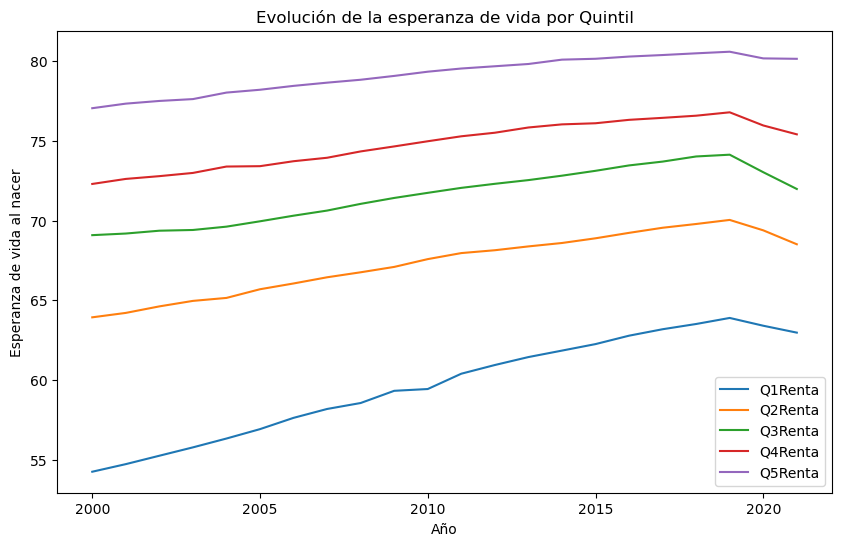

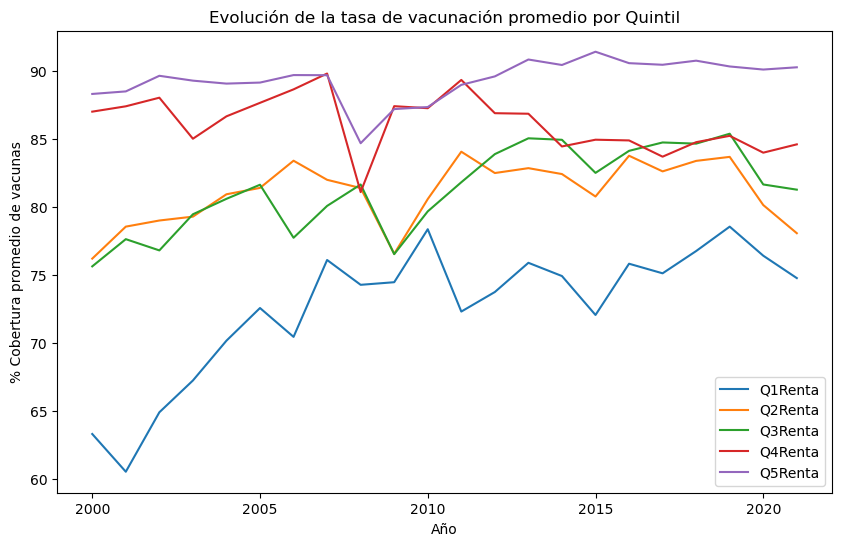

In [35]:
# --- 1. Crear tabla resumen ---
vacunas_cols = [
    'BCG (% of one-year-olds immunized)',
    'HepB3 (% of one-year-olds immunized)',
    'Hib3 (% of one-year-olds immunized)',
    'IPV1 (% of one-year-olds immunized)',
    'MCV1 (% of one-year-olds immunized)',
    'PCV3 (% of one-year-olds immunized)',
    'Pol3 (% of one-year-olds immunized)',
    'RCV1 (% of one-year-olds immunized)',
    'RotaC (% of one-year-olds immunized)',
    'YFV (% of one-year-olds immunized)',
    'DTP3 (% of one-year-olds immunized)',
    'Period life expectancy at birth - Sex: all - Age: 0'
]

# Pivot table: Quintil como filas, columnas vacunas + esperanza de vida
tabla_resumen = Tabla_definitiva.groupby("Quintil")[vacunas_cols].mean().round(2)
print(tabla_resumen)

# --- 2. Evolución temporal de la esperanza de vida por quintil ---
vida_quintil = Tabla_definitiva.groupby(["Year", "Quintil"])[
    'Period life expectancy at birth - Sex: all - Age: 0'
].mean().reset_index()

plt.figure(figsize=(10,6))
for q in vida_quintil["Quintil"].unique():
    datos = vida_quintil[vida_quintil["Quintil"]==q]
    plt.plot(datos["Year"], datos['Period life expectancy at birth - Sex: all - Age: 0'], label=q)

plt.title("Evolución de la esperanza de vida por Quintil")
plt.xlabel("Año")
plt.ylabel("Esperanza de vida al nacer")
plt.legend()
plt.show()

# --- 3. Evolución temporal de la tasa de vacunación promedio por quintil ---
vacunas_quintil = Tabla_definitiva.groupby(["Year", "Quintil"])[vacunas_cols].mean().reset_index()

plt.figure(figsize=(10,6))
for q in vacunas_quintil["Quintil"].unique():
    datos = vacunas_quintil[vacunas_quintil["Quintil"]==q]
    plt.plot(datos["Year"], datos[vacunas_cols].mean(axis=1), label=q)

plt.title("Evolución de la tasa de vacunación promedio por Quintil")
plt.xlabel("Año")
plt.ylabel("% Cobertura promedio de vacunas")
plt.legend()
plt.show()


# CONCLUSIONES

1. Relación entre quintil y vacunación:

   Los quintiles superiores (Q4–Q5) tienden a mostrar mayores tasas de vacunación promedio, reflejando mejores sistemas sanitarios y más recursos.

 2. Relación entre quintil y esperanza de vida:

    Los quintiles altos muestran un crecimiento sostenido y niveles más altos de esperanza de vida.
    Los quintiles bajos, aunque mejoran con los años, lo hacen de forma más lenta y con valores más bajos.

 3. Tendencia temporal:

    En todos los quintiles la cobertura de vacunas y la esperanza de vida tienden a aumentar con los años,aunque la brecha entre quintiles puede mantenerse o incluso ampliarse-
    Vemos que todos los paises presentan una tendenica similar pero sus curvas a veces se ven alteradas, en el caso del 2004 y a traves de investigaciones, vemos que en 2004 debido a un cmabio en la fuente estadistica de la OMS se produjo la pequela variacion que se ve en las graficas y para el quintil 1, vemos que la crisis del 2008 afectó significativamente, ya que la esperanza de vida se matuvo estable y no presenta una tendencia al alza como en el resto de quintiles, lo cual nos puede indicar que las crisis afectó en mayor medida a los paises que componen este quintil.

 4. Interpretación:

    La mejora en la vacunación contribuye al aumento de la esperanza de vida, como es logico.
    Las diferencias entre quintiles reflejan inequidades en acceso a salud
    Los países del quintil más alto (Q5) tienden a tener mayor cobertura de vacunación y mayor esperanza de vida que los del quintil más bajo (Q1).
    La brecha de vacunación se reduce con los años, mientras que la brecha de esperanza de vida persiste.
    La correlación positiva es debil pero indica que la vacunación contribuye al aumento de esperanza de vida, pero otros factores también son importantes.

 5. Evolucion de la tasa de vacunacion.

    Hasta el año 2006 vemos una tendencia positiva de vacunacion, pero entre 2008 y 2009 vemos una caida general bastante mas acusada en los paises con mas renta, esto podria ser por reduccion de presupuesto, y por lo tanto hay menos vacunas por lo que, si la tasa de vacunacion suele ser alta, se va a ver mas afetada por este suceso. A partir de aqui vemos que poco a poco vuelve a recuperarse, bajando en 2020, debido al COVID, donde se priorizo esta vacuna frente al resto, dejando muchas vacunas de lado.

# HIPOTESIS 2

H₀ (Hipótesis nula): Un mayor ratio de suicidio reduce significativamente la esperanza de vida, y este efecto es más pronunciado en países con altos niveles de pobreza y mayor número de muertes por causas naturales.

H₁ (Hipótesis alternativa): El ratio de suicidio no afecta significativamente la esperanza de vida, y no interactúa con los niveles de pobreza ni con el número de muertes por causas naturales en el país.

In [36]:
# Hay que crear una tabla donde en las filas vamos a poner los quintiles, el ratio de suicidio en las columnas medio para el 2000, lo mismo para el 2005, 2010, 2015 y 2019 ademas de
# dinero invertido o el gasto en PIB, de estas variables tenemos que sacar un cociente de relacion entre ambos para ver si ha mejorado o empeorado cada 5 años

In [37]:
# Filtramos los años de interés
años = [2000, 2005, 2010, 2015, 2019]
df_filtrado = Tabla_definitiva[Tabla_definitiva["Year"].isin(años)]

# Agrupamos por quintil y año sacando los promedios
tabla_promedios = df_filtrado.groupby(["Quintil", "Year"])[
    ["Age-standardized suicide rate - Sex: both sexes", "Renta per capita"]
].mean().reset_index()

# Renombramos columnas para simplificar
tabla_promedios.rename(columns={
    "Age-standardized suicide rate - Sex: both sexes": "Suicide_rate",
    "Renta per capita": "Gasto"
}, inplace=True)

# Calculamos el cociente suicidio/gasto
tabla_promedios["Ratio_suicide_gasto"] = (
    tabla_promedios["Suicide_rate"] / tabla_promedios["Gasto"]
)

# Pivotamos para que Quintil = filas y Year = columnas
tabla_ratio = tabla_promedios.pivot(
    index="Quintil", columns="Year", values="Ratio_suicide_gasto"
)

# Redondeamos a 2 decimales
tabla_ratio = tabla_ratio.round(2)
# Escalamos el ratio por 1000 para mejor interpretación
escala = 1000  

tabla_promedios["Ratio_suicide_gasto"] = (
    tabla_promedios["Suicide_rate"] / tabla_promedios["Gasto"]
) * escala

# Pivot para que Quintil = filas y Year = columnas
tabla_ratio = tabla_promedios.pivot(
    index="Quintil", columns="Year", values="Ratio_suicide_gasto"
)

# Redondeamos a 2 decimales
tabla_ratio = tabla_ratio.round(2)

print(f"Ratio suicidio/gasto (multiplicado por {escala}):")
print(tabla_ratio)

Ratio suicidio/gasto (multiplicado por 1000):
Year     2000  2005  2010  2015  2019
Quintil                              
Q1Renta  8.47  7.78  8.09  7.80  7.06
Q2Renta  2.68  2.59  2.52  2.29  2.13
Q3Renta  1.37  1.37  1.27  1.15  1.05
Q4Renta  0.96  0.86  0.76  0.66  0.57
Q5Renta  0.32  0.29  0.27  0.26  0.25


# CONCLUSIONES

1. Era una suposicion obvia pero a veces hay que asegurarse de que una hipotesis es como relamente se piensa. La relación suicidio/gasto mejora en todos los quintiles, lo que sugiere que la inversión económica es eficaz para reducir la mortalidad por suicidio.

2. Los países más pobres tienen mayor proporción de suicidios por unidad de PIB, aunque la tendencia es positiva, ademas podemos ver que el resto de factores socieconomicos afectan a los paises del Quintil 1 ya que la tendencia es negativa, pero durante la crisis del 2008, fue el unico quintil en el que la tendencia cambio, mientras que en el resto de quintiles siempre ha sido negativa.

3. Los países más ricos logran mayor eficiencia del gasto en reducir suicidios, aunque el impacto es menos significativo ya que se parte de una base mejor.

4. Relación inversa: Se puede decir que a mayor inversión en salud, menor es el ratio de suicidio relativo al gasto, aunque no es una relación perfectamente lineal ni la única variable que influye. Otros factores sociales, culturales y económicos también juegan un papel importante, tal y como se comento en el punto 2.

5. Evidencia de mejora: Incluso los quintiles bajos muestran que al aumentar ligeramente la inversión o mantenerla constante, el cociente disminuye con el tiempo, reforzando la idea de que el gasto en salud contribuye a reducir el suicidio, como era de esperar.

# HIPOTESIS 3

H₀ (Hipótesis nula): Niveles más altos de pobreza están asociados con un aumento significativo en el ratio de suicidio, debido a que la pobreza genera condiciones de vida precarias y estrés económico que aumentan la vulnerabilidad psicológica, y este efecto es más pronunciado en poblaciones con menor acceso a servicios de salud, donde la atención y prevención del suicidio son limitadas. ( parece obvio pero paises asiáticos como corea del sur tienen un ratio de suicidio alto)

H₁ (Hipótesis alternativa): El nivel de pobreza no tiene un efecto significativo sobre el ratio de suicidio, ni este efecto varía según el acceso a servicios de salud en la población.

In [38]:
# Simplemente vamos a ver por quintiles y año a año la correlacion entre el pib medio de los distintos quintiles y el ratio medio de suicidio de cada uno, ademas podrias investigar 
# los principales motivos de suicidio en esos paises para ver cual es el motivo y proponer una propuesta accionable

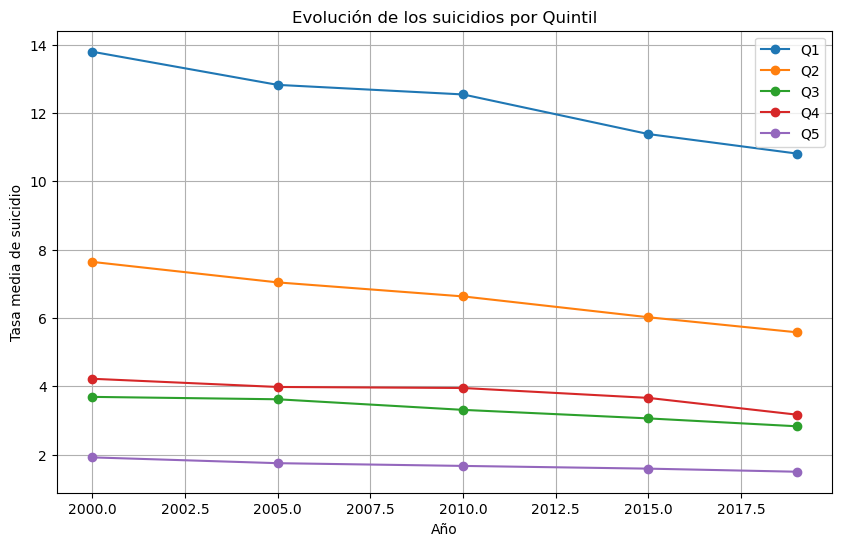

In [39]:
años = [2000, 2005, 2010, 2015, 2019]
q1 = [13.79, 12.82, 12.54, 11.38, 10.81]
q2 = [7.64, 7.04, 6.63, 6.02, 5.58]
q3 = [3.69, 3.62, 3.31, 3.06, 2.83]
q4 = [4.22, 3.98, 3.95, 3.66, 3.17]
q5 = [1.92, 1.75, 1.67, 1.59, 1.50]

# Crear figura
plt.figure(figsize=(10,6))

# Graficar cada quintil
plt.plot(años, q1, marker='o', label="Q1")
plt.plot(años, q2, marker='o', label="Q2")
plt.plot(años, q3, marker='o', label="Q3")
plt.plot(años, q4, marker='o', label="Q4")
plt.plot(años, q5, marker='o', label="Q5")

# Título y etiquetas
plt.title("Evolución de los suicidios por Quintil")
plt.xlabel("Año")
plt.ylabel("Tasa media de suicidio")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Relación entre pobreza y suicidio

fig = px.scatter(
    Tabla_definitiva,
    x='Renta per capita',
    y='Age-standardized suicide rate - Sex: both sexes',
    color='Quintil',
    hover_data=['Country', 'Year'],
    log_x=True,
    opacity=0.6,
    title='Relación entre pobreza y tasa de suicidio'
)

fig.update_layout(
    xaxis_title='Renta per cápita',
    yaxis_title='Tasa de suicidio (por cada 1000)',
    legend_title='Quintil de renta'
)

fig.show()

In [45]:
lesotho_data = Tabla_definitiva[Tabla_definitiva['Country'] == 'Lesotho']
lesotho_data['Age-standardized suicide rate - Sex: both sexes']

12270     42.6040
12271     40.4066
12272     42.5535
12273     45.6768
12274     47.0599
12275     46.7412
12276     55.3566
12277     61.2674
12278     77.7903
12279     84.6270
12280     86.8905
12281     91.0699
12282    101.9589
12283    111.4236
12284    116.1953
12285    114.4881
12286    107.1207
12287     96.2889
12288     93.0725
12289     87.4824
12290         NaN
12291         NaN
Name: Age-standardized suicide rate - Sex: both sexes, dtype: float64

In [41]:
corr_total = Tabla_definitiva[['Renta per capita', 'Age-standardized suicide rate - Sex: both sexes']].corr().iloc[0,1]
print(f'Correlación renta-suicidio: {corr_total:.2f}')

Correlación renta-suicidio: -0.11


# CONCLUSIONES

1. La figura refuerza la idea de que las tasas de suicidio han evolucionado de forma desigual según el nivel socioeconómico. Aunque hay una tendencia global a la baja, países pobres o con crisis recurrentes, como Lesotho, mantienen niveles críticamente altos, reflejando una persistente desigualdad en salud mental y bienestar social.

2. Vemos que a pesar de que los datos muestran lo logico y que a pesar de que la tendencia de ratio de suicidio es negativa, vemos que existen algunos outliers dentro de nuestros grupos, como puede ser el caso de rusia, el cual puede ser un pais que presente una tasa de suicidio superior al de algunos paises de africa por algun factor de presion social, o cultural en el caso de por ejemplo, corea del sur, donde el fracaso escolar aumentaba bastante el ratio de suicido.

3. Hay muchos paises de europa del este que presentan ratio de suicidio alto, esto problablemente es debido a problemas spciales como que es tabú hablar de ciertos temas personales como la depresion, el consumo de alcohol o tambien las posibles faltas de oportunidades lanorales, o el clima podria tambien afectar.

4. La correlacion entre la renta y el ratio de suicidio es negativa pero no muy significante, es decir, cuanto mas ratio de suicidio menos renta pero no es una correlacion muy fuerte, esto podemos confirmarlo con lo dicho anteriormente viendo que se cumple con la logica pero no siempre se cumple.